# Tarea 6

**Envío del PR inicial:** Sábado, 3 de noviembre

**Aceptación del PR:** Viernes 9 de noviembre

**NOTA:** Esta tarea debe entregarse en equipo.

# 1

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov en mapeos de 1 variable, a mapeos de 2 variables?


- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$, para el mapeo $x\mapsto f(x)$?

Para la primera parte:

En el caso unidimensional la idea es medir las tasas de  separación de puntos cercanosa lo largo del eje real. En dos dimensiones, el comportamiento local de la dinámica puede variar con la dirección. Los puntos cercanos pueden estar separándose a lo largo de una dirección y moviéndose juntos a lo largo de otra.

Entonces, si $f$ es un mapeo suave en $\mathbb{R}^2$, sea $J_n=Df^n(x_0)$ y para $k=1,2$ sea $r_{k}^n$ la longitud del eje k más largo y ortogonal de la elipse $J_{n}N$ para una órbita con punto inicial $v_{0}$. Entonces $r_{k}^n$ mide la contracción o expansión cerca de la órbita de $v_0$ durante las primeras n iteraciones.

El número $k$ de Lyapunov de $v_0$ está definido por:

$        L_k = \lim_{n-> \infty} (r_{k}^n)^{1/2} $

Si este límite existe. El exponente $k$ de Lyapunov de $v_0$ es:  $h_k =ln(L_k)$. Donde como se mencionó anteriormente $k=1,2$.

Para la segunda parte:

El exponente de Lyapunov $λ(x_0)$ para el mapeo $x -> f(x)$ está dado por:

$λ(x_0)= \lim_{n-> \infty} \frac{1}{n} log [ | \frac{df^n(x_0)}{dx} | ] = \lim_{n-> \infty} \frac{1}{n} log[|f'(x_0)f'(x_1)...f'(x_{n-1}) | $

Mientras que para $λ(f(x_0))$ está dado por:

$λ(f(x_0))= \lim_{n-> \infty} \frac{1}{n} log[ | \frac{df^n(f(x_0))}{dx} | ] =  \lim_{n-> \infty} \frac{1}{n} log[ | \frac{df^{n+1}(x_0)}{dx} | ]  = \lim_{n-> \infty} \frac{1}{n} log[|f'(x_0)f'(x_1)...f'(x_{n}) | ] $

En donde para $λ(f(x_0))$ se está tomando el exponente de Lyapunov para la primera iteración del mapeo, en consecuencia el número de derivadas dentro del valor absoluto será hasta $x_n$. 

# 2

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [1]:
using PyPlot

using LaTeXStrings

#pyplot(grid=:true, legend=:false, size=(400,267))

In [2]:
#"Módulo" Diferenciación Automática
import Base: +, -, *, /, ^
import Base.show
import Base: sqrt, exp, log, sin, cos, sinh, cosh

"""
    Dual

Definición de los números duales. Los campos internos son
    x  :: Float64   # valor de la función
    x′ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x′ :: Float64
end

Dual(c::Real) = Dual(c, 0.0)
dual(x0::Real) = Dual(x0, 1.0)

+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)

-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)

*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

function ^(a::Dual, n::Int)
    y = a.x^(n-1)
    Dual(a.x * y, n*y*a.x′)
end

#+
+(a::Real, u::Dual) = Dual( a + u.x, u.x′)
+(u::Dual, a::Real) = Dual( a + u.x, u.x′)
#-
-(a::Real, u::Dual) = Dual( a - u.x, -u.x′)
-(u::Dual, a::Real) = Dual( u.x - a, u.x′)
#*
*(a::Real, u::Dual) = Dual(u.x*a,u.x′*a)
*(u::Dual, a::Real) = Dual(u.x*a,u.x′*a)
#/
function /(a::Real,u::Dual)
    y = a / u.x
    Dual( y, (-y * u.x′)/u.x )
end
/(u::Dual, a::Real)=Dual( u.x/a, u.x′/a )

function show(u::Dual)
    print(string(u.x)*" + "*string(u.x′)*"ε")
end

sqrt(u::Dual)=Dual(sqrt(u.x),u.x′/(2*sqrt(u.x)))
exp(u::Dual)=Dual(exp(u.x),u.x′*exp(u.x))
log(u::Dual)=Dual(log(u.x),u.x′/u.x)
sin(u::Dual)=Dual(sin(u.x),u.x′*cos(u.x))
cos(u::Dual)=Dual(cos(u.x),-u.x′*sin(u.x))
sinh(u::Dual)=Dual(sinh(u.x),u.x′*cosh(u.x))
cosh(u::Dual)=Dual(cosh(u.x),u.x′*sinh(u.x))

"Método de Newton con Duales a partir de una función real f y un valor inicial x=0."
function newton(f,x0,tol=1e-15)
    fprime(x)=f(dual(x)).x′
    xn=x0
    while abs(f(xn))>tol
        xn=xn-f(xn)/fprime(xn)
    end
    return xn
end

"A partir de una función real f, y un rango x0, devuelven las raíces encontradas"
function soluciones(f,x0)
    raiz=[]
    raices=[]
    for i in x0
        r=newton(f,i)
        if abs(r)≠Inf
            push!(raiz,r)
        end
    end
    push!(raices,raiz[1])
    for i in 1:size(raiz,1)-1
        if abs(raiz[i]-raiz[i+1])>1e-10
            a=true
            b=true
            for j in raices
                if abs(raiz[i+1]-j)>1e-10
                    a=true
                else
                    a=false
                b=(a & b)
                end
            end
            if b==true
                push!(raices,raiz[i+1])
            end
        end
    end
    return raices
end

soluciones

In [3]:
"""Esta función nos permite obtener el diagrama de Lyapunov de manera numérica en términos de c para la función Q(x,c)=x^2+c con
c en el intervalo [-2,2]."""
function Lyapunov(f::Function,x0,iteraciones,domc)
    L=Float64[] 
    c_valores=Float64[]
    
    for j in domc
        λ=0
        fc(x)=f(x,j)
        
        for _ in 1:100
            x0=fc(x0)
        end  
        for k in 1:iteraciones
            x=fc(dual(x0))
            λ += (log(abs(x.x′))/(iteraciones+100))
            x0=fc(x0)
        end
        push!(L,λ)
        push!(c_valores,j)
    end
    return c_valores,L
end

Lyapunov

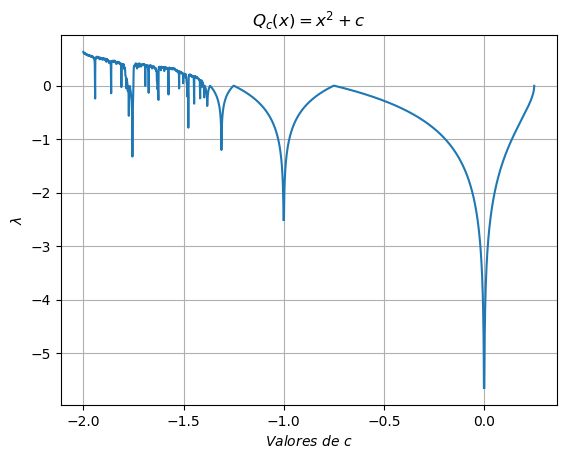

In [4]:
Q(x,c)=x^2+c

c_valores,L=Lyapunov(Q,0.1,1000,-2.0:0.001:2)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

Para $c=0.25$ :

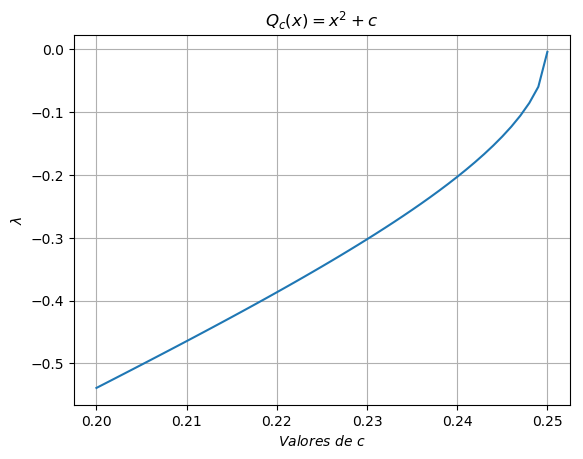

In [5]:
c_valores,L=Lyapunov(Q,0.1,1000,0.20:0.001:0.30)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

Para $c=-0.75$ :

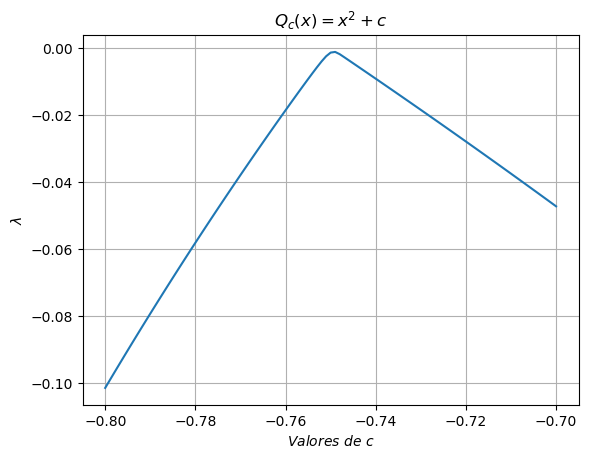

In [6]:
c_valores,L=Lyapunov(Q,0.1,1000,-0.80:0.001:-0.70)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

Veamos que particularidades ocurren para los valores c en los que el mapeo presenta bifurcaciones:

Para $c=-1.25$ :

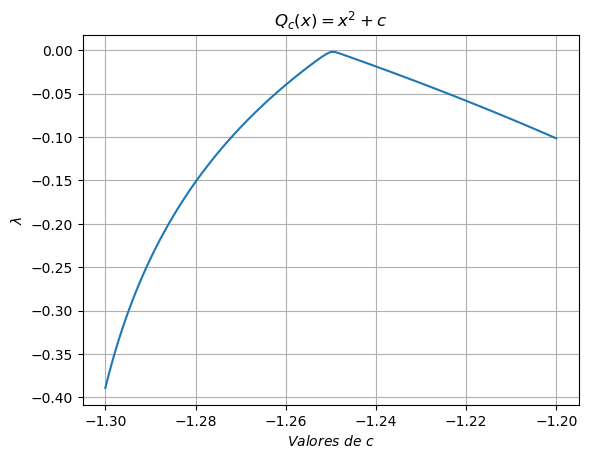

In [7]:
c_valores,L=Lyapunov(Q,0.1,1000,-1.30:0.001:-1.20)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

Como se puede observar, aquellos puntos de $c$ donde ocurre una bifurcación del mapeo, el exponente de Lyapunov es cero.

Por otro lado, cuando tenemos ciclos superestables; es decir, cuando $x=0$.

En $c_0=0$ se tiene un ciclo superestable periódico de periodo 1. En este caso, uno puede sustituir $c=0$ en el mapeo $Q_c(x)$ , y notar que $Q_0(x)=x$ se cumple para $x=0$ .



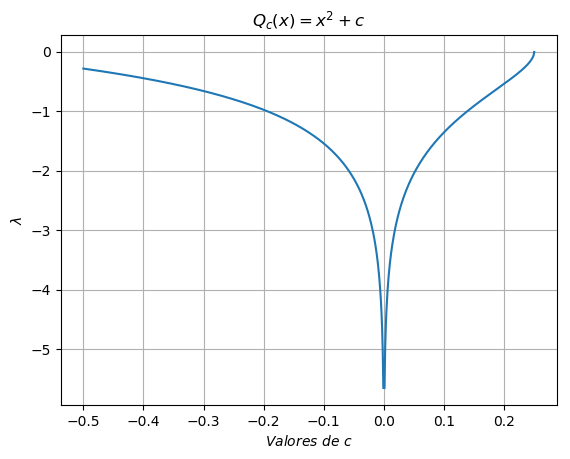

In [8]:
c_valores,L=Lyapunov(Q,0.1,1000,-0.5:0.001:0.5)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

En $c_1=-1$ se tiene otro ciclo superestable periódico de periodo 2.

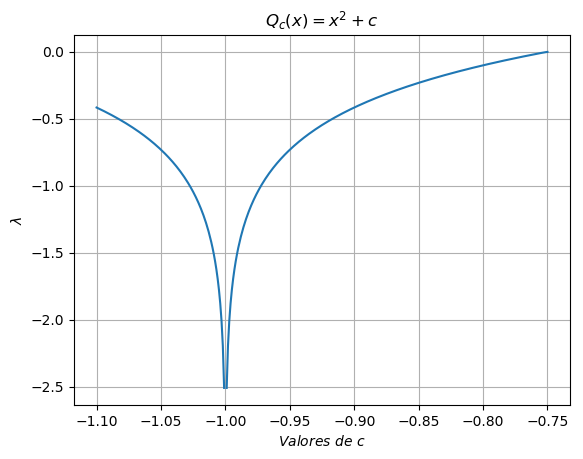

In [9]:
c_valores,L=Lyapunov(Q,0.1,1000,-1.1:0.001:-0.75)
plot(c_valores,L)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

De las gráficas anteriores se puede observar que en términos del exponente de Lyapunov,  un ciclo super estable de periodo-k va a manifestarse por medio de picos de mínimos relativos en el diagrama, siendo en este caso el de periodo 1 en $c=0$ el de mayor tamaño, posteriormente el ciclo superestable de periodo 2 corresponde al pico inferior que se encuentra a su izquierda en $c=-1$ y así sucesivamente.

# 3

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea5`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

Para este ejercicio utilizaremos la función de newton implementada con el módulo 'TaylorSeries' así como otras herramientas del notebook 7 para obtener el valor de las $C_n$.

In [10]:
using TaylorSeries

In [11]:
"Mapeo cuadrático evaluado en `x`, con parámetro `c`"
Qc(x,c) = x^2 + c
Qc(x, args...) = !c(x, args[1])

"Derivada de `Qc(x,c)` respecto a `x` evaluada en `x`, con parámetro `c`"
Qc´(x,c) = 2x

Qc´

In [12]:
C0 = 0.0

0.0

In [13]:
Qc(0.0,C0) == 0.0

true

In [14]:
doc"""
    Qcⁿ(x, args)

Esta función define el n-enésimo iterado de $Qc(x,c)$,
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ

In [15]:
function roots_newton(f, x0)
    t = Taylor1(eltype(x0), 1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT[0]/fT[1]
    end
    x0

end

roots_newton (generic function with 1 method)

In [16]:
Q4c = c -> Qcⁿ(0.0, (c, 4))
C2 = roots_newton(Q4c,-1.4)

-1.3107026413368328

In [17]:
Q8c = c -> Qcⁿ(0.0, (c,8))
C3 = roots_newton(Q8c,-1.4)

-1.3815474844320617

In [18]:
Q16c = c -> Qcⁿ(0.0, (c,16))
C4 = roots_newton(Q16c,-1.4)

-1.3969453597045607

In [19]:
Q32c = c -> Qcⁿ(0.0, (c,32))
C5 = roots_newton(Q32c,-1.40) 

-1.4002530812147829

In [20]:
Q64c = c -> Qcⁿ(0.0, (c,64))
C6 = roots_newton(Q64c,-1.401)

-1.4009619629448422

Para el mapeo $Q_c(x)=x^2+c$:

Se tiene un ciclo super estable de periodo 1 en $c=0$.

Se tiene un ciclo super estable de periodo 2 en $c=-1$.

Se tiene un ciclo super estable de periodo 4 en $c\approx -1.3107026413368328$ 

Se tiene un ciclo super estable de periodo 8 en $c\approx -1.3815474844320617$.

Se tiene un ciclo super estable de periodo 16 en $c\approx -1.3969453597045607$.

Se tiene un ciclo super estable de periodo 32 en $c\approx -1.4002530812147829$.

Se tiene un ciclo super estable de periodo 64 en $c\approx -1.4009619629448422$.

Definamos:
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}}
\end{eqnarray*}

In [21]:
function fn(cn,cn1,cn2)
fn=(cn-cn1)/(cn1-cn2)
end    

fn (generic function with 1 method)

In [22]:
fn(0,-1,-1.3107)

3.21853878339234

In [23]:
Cn=[0,-1,-1.3107026413368328,-1.3815474844320617,-1.3969453597045607,-1.4002530812147829,-1.4009619629448422]

for i in 1:5
    A=fn(Cn[i],Cn[i+1],Cn[i+2])
    println(A)
end

3.218511422038089
4.38567759856832
4.600949276538136
4.655130495391898
4.666111947821384


Esta secuencia de números también convergen a la llamada constante de Feigenbaum: $\delta \approx 4.669201609...$

Ahora, definamos la relación:
\begin{eqnarray*}
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

Utilizaremos una función implementada en el ejercicio 3 de la tarea 5 para obtener las distancias pertenecientes a las órbitas súperestables de periodo p de f(x) en el intervalo c que se encuentren más cercanas a la recta x=0.

 

In [24]:
"""
    ciclosestables!(xx, f, cc, nit, nout)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0, cc)` tenga sentido. La idea es que los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`.
"""
function ciclosestables!(xx, f, cc, nit, nout)
    @assert (nit > 0) && (nout > 0)
    
    x0=0.01
    # Primeros nit iterados
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

"""
    diag_bifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diag_bifurc(f, nit, nout, crange)
#     xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(view(ff, :, ic), f, c, nit, nout)
#         ff[:,ic] = xx
    end
    
    return ff
end

diag_bifurc

In [25]:
"""La función encuentra la distancia del x≠0 perteneciente a la órbita súperestable de periodo p de f(x) en el intervalo c
más cercano al 0"""
function d_n(f,c,p;nit=1000000) 
        mapeo = diag_bifurc(f, nit, p, [c[1]])
        h0=1
        s=c[1]-c[2]
        for j in 1:p
            h=mapeo[j,1]
            if abs(h)<abs(h0)
                h0=h
            end
        end
        h1=h0
    for i in c
        mapeo = diag_bifurc(f, nit, p, [i])
        h0=1
        for j in 1:p
            h=mapeo[j,1]
            if abs(h)<abs(h0)
                h0=h
            end
        end
        if h1*h0<0
            mapeo = diag_bifurc(f, nit, p, [i+s])
            H=[]
            for j in 1:p
            push!(H,abs(mapeo[j,1]))
            end
            H=sort(H)
            return(H[2])
            break
        end
    end
end

d_n

In [26]:

d_n(Q,-0.90:-1/10^4:-1.24,2)

1.0

In [27]:

d_n(Q,-1.25:-1/2^14:-1.35,4)

0.4071841299417698

In [28]:
d_n(Q,-1.3681:-1/2^15:-1.395,8)

0.16336815248402758

In [29]:
d_n(Q,-1.395:-1/2^16:-1.3999,16)

0.06532317928152831

In [30]:
d_n(Q,-1.3999:-1/2^17:-1.401,32)

0.026099990316489796

In [31]:
d_n(Q,-1.4011:-1/2^24:-1.402,64;nit=100000)

0.011566319937746705

In [32]:
function an(dn,dn1)
an=dn/dn1
end    

an (generic function with 1 method)

In [33]:
an(1,0.4071841299417698)

2.455891392778513

In [34]:
Dn=[1,0.4071841299417698,0.16336815248402758,0.0653231792815283,0.02609999031648979,0.011566319937746705]

for i in 1:4
    B=an(Dn[i],Dn[i+1])
    println(B)
end

2.455891392778513
2.4924327278634064
2.5009216373248977
2.502804732469865


Esta secuencia converge a otra constante conocida como la constante $\alpha$ de Feigenbaum: $\alpha \approx  2.50290787...$

# 4

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


Primero, veamos el mapeo $Q_c(x)$ en $c=1/4$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-3/4$ :

In [35]:
function y(x,param)
    z=[]
    for i in x
        push!(z,Qcⁿ(i, param))
    end
    return z
end

y (generic function with 1 method)

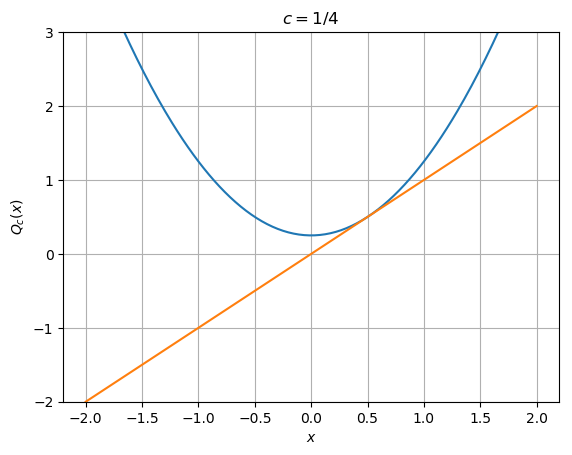

In [36]:
xrange = -2:1/64:2

z=y(xrange, (1/4,1))
plot(xrange, z)
plot(xrange, xrange)
grid(true)
ylim(-2,3)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = 1/4")
show()

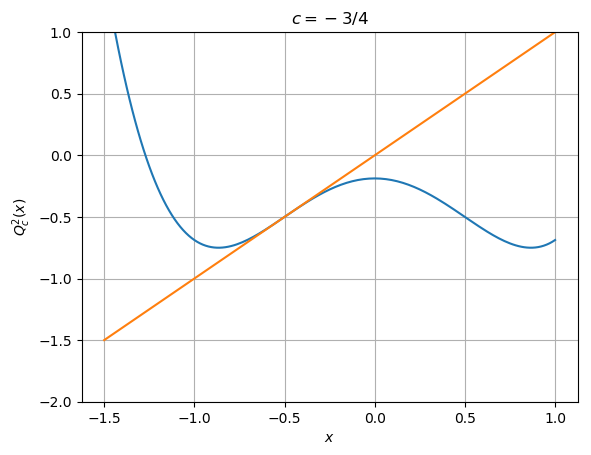

In [37]:
xrange = -1.5:1/64:1
z=y(xrange, (-3/4,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,1)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-3/4")
grid(true)
show()

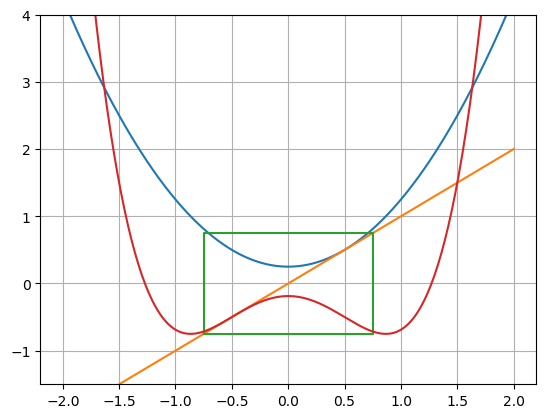

In [38]:
xrange = -2:1/64:2
z=y(xrange,(1/4,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-1.5,4)

x₁ = -0.75
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z1=y(xrange, (-3/4,2))
plot(xrange, z1)
grid(true)



Como se puede apreciar, al comparar la gráfica de ambos mapeos en los valores $c=1/4$ y $c^{\prime} =-3/4$ en la zona de interés que se muestra en el cuadro verde, la gráfica indica que localmente se parecen al considerar una reflexión.



Veamos el mapeo $Q_c(x)$ en $c=0$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1$ :

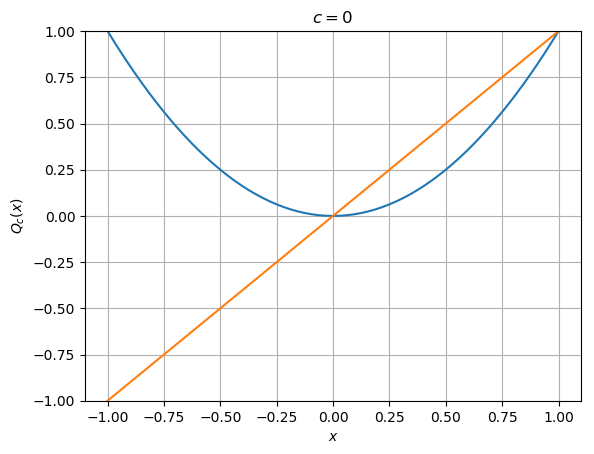

In [39]:
xrange = -1:1/64:1
z=y(xrange,(0,1))
plot(xrange,z)
plot(xrange, xrange)
ylim(-1,1)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = 0")
grid(true)

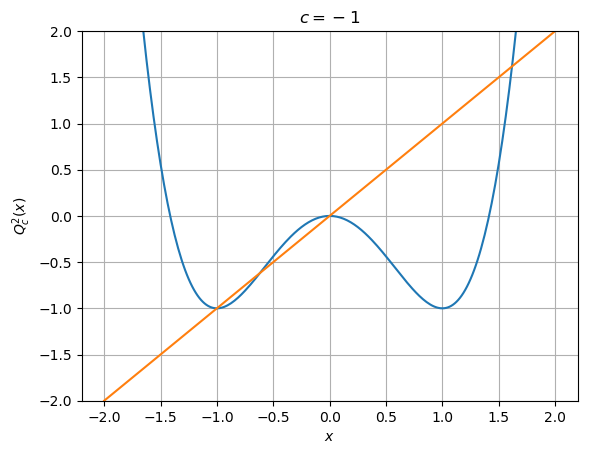

In [40]:
xrange = -2:1/64:2
z=y(xrange,(-1,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-1")
grid(true)

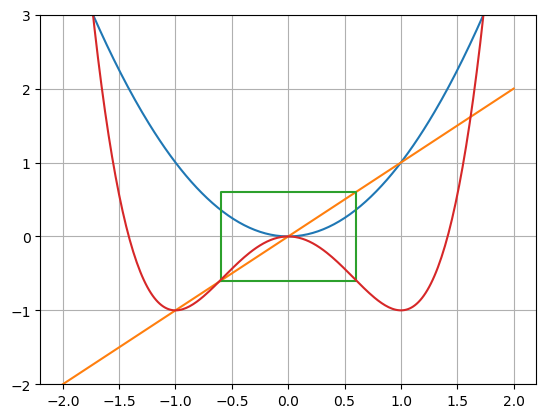

In [41]:
xrange = -2:1/64:2
z=y(xrange,(0,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,3)
x₁ = -0.6
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z=y(xrange,(-1,2))
plot(xrange, z)
grid(true)

Al comparar bajo una reflexión la gráfica de ambos mapeos en los valores $c=0$ y $c^{\prime} =-1$ en la zona de interés que se muestra en el cuadro verde, parece existir una similitud entre el mapeo $Q_0(x)$; aunque de manera local, con el mapeo $Q^2_{-1}(x)$.



Veamos el mapeo $Q_c(x)$ en $c=-3/4$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-5/4$ :

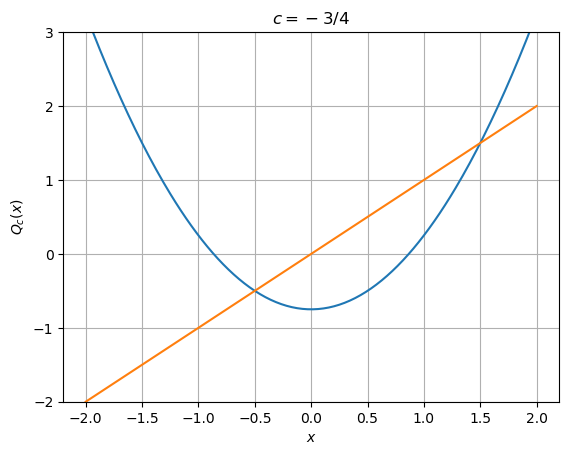

In [42]:
xrange = -2:1/64:2
z=y(xrange,(-3/4,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,3)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -3/4")
grid(true)

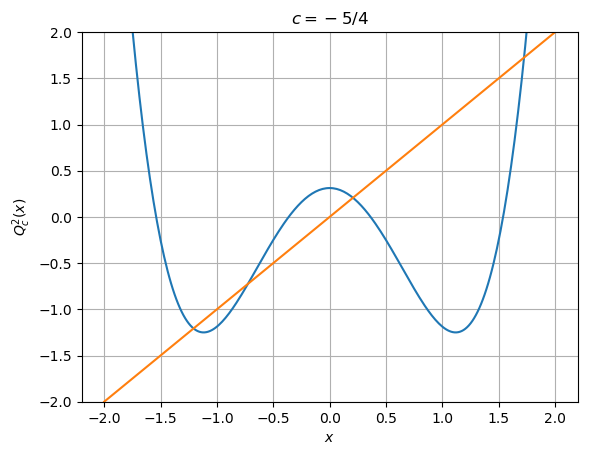

In [43]:
xrange = -2:1/64:2
z=y(xrange,(-5/4,2))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-5/4")
grid(true)

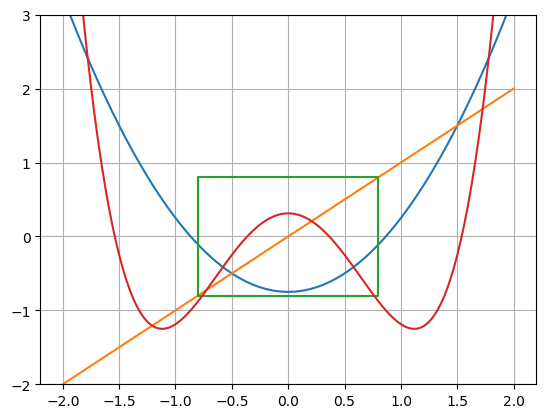

In [44]:
xrange = -2:1/64:2
z=y(xrange,(-3/4,1))

plot(xrange, z)
plot(xrange,xrange)
ylim(-2,3)

x₁ = -0.8
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z=y(xrange,(-5/4,2))

plot(xrange, z)
grid(true)



En esta ocasión, al comparar la gráfica de ambos mapeos en los valores $c=0$ y $c^{\prime} =-1$ se puede observar una clara intersección entre ellos, no obstante si se realiza una ligera traslación hacia arriba del mapeo $Q^2_{-5/4}$ y posteriormente una reflexión en la zona de interés que se muestra en el cuadro verde, se podrá notar que nuevamente existe una similitud con  $Q_{-3/4}(x)$ localmente.

Primero, veamos el mapeo $Q_c(x)$ en $c=-1$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.3$ :

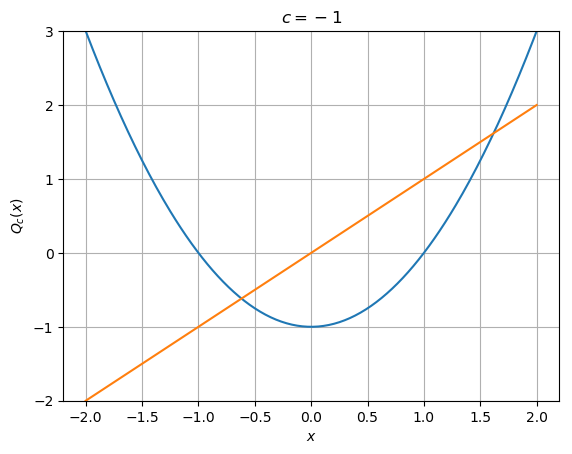

In [45]:
xrange = -2:1/64:2
z=y(xrange,(-1,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,3)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1")
grid(true)


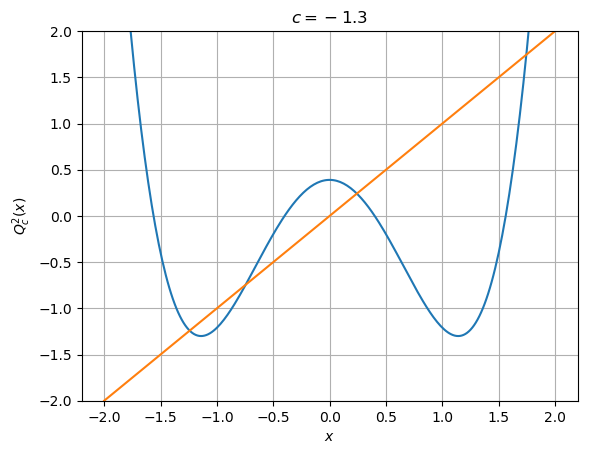

In [46]:
xrange = -2:1/64:2
z=y(xrange,(-1.3,2))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-1.3")
grid(true)


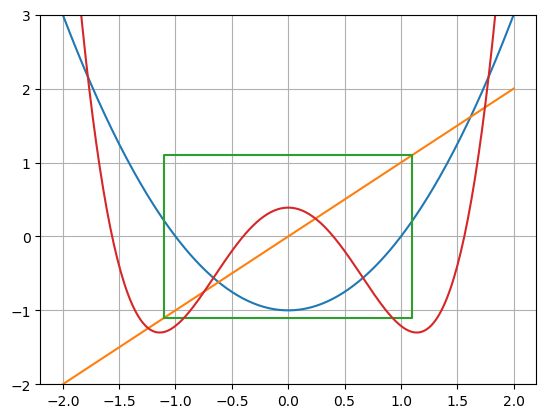

In [47]:
xrange = -2:1/64:2
z=y(xrange,(-1,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,3)

x₁ = -1.1
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z=y(xrange,(-1.3,2))
plot(xrange, z)
grid(true)


En esta ocasión, al comparar la gráfica de ambos mapeos en los valores $c=-1$ y $c^{\prime} =-1.3$ se puede observar una clara intersección entre ellos mayor a la anterior; sin embargo, para la comparación la reflexión que se debe efectuar ya no es alradedor del origen, sino alrededor de $-0.5$ en el eje de las ordenadas. Bajo esta suposición, la zona de interés que se muestra en el cuadro verde, evidencia nuevamente una similitud local entre ambos mapeos.

Ahora, veamos el mapeo $Q_c(x)$ en $c=-2$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.546$ :

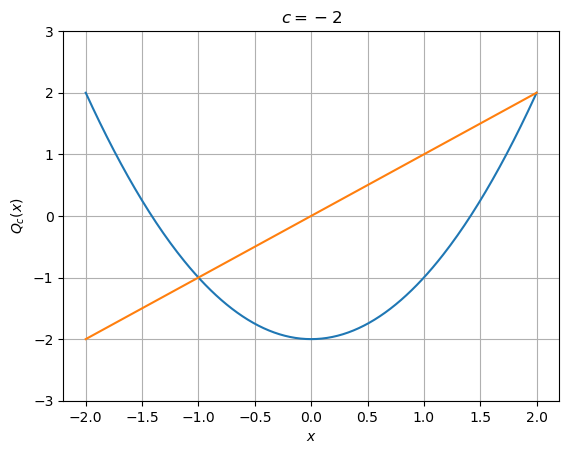

In [48]:
xrange = -2:1/64:2
z=y(xrange,(-2,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-3,3)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -2")
grid(true)


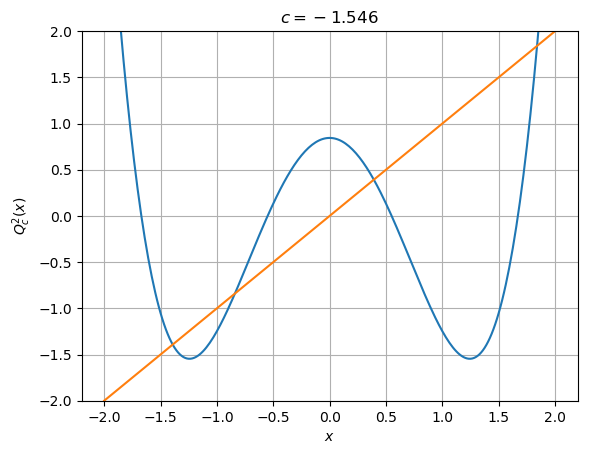

In [49]:
xrange = -2:1/64:2
z=y(xrange,(-1.546,2))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-1.546")
grid(true)


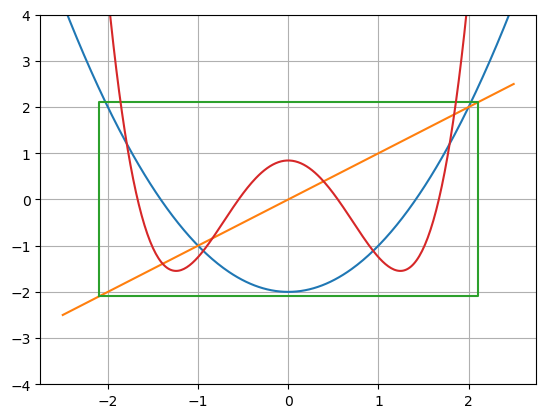

In [50]:
xrange = -2.5:1/64:2.5
z=y(xrange,(-2,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-4,4)

x₁ = -2.1
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z=y(xrange,(-1.546,2))
plot(xrange, z)
grid(true)


En esta ocasión, al comparar la gráfica de ambos mapeos en los valores $c=-2$ y $c^{\prime} =-1.546$ se puede observar una clara intersección entre ellos mayor a la anterior; sin embargo, para la comparación la reflexión que se debe efectuar ya no es alradedor del origen, sino alrededor de $-1$ en el eje de las ordenadas. Bajo esta suposición, la zona de interés que se muestra en el cuadro verde, se observa nuevamente una similitud local entre ambos mapeos.

Por último, veamos el mapeo $Q_c(x)$ en $c=-2.2$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.65$ :

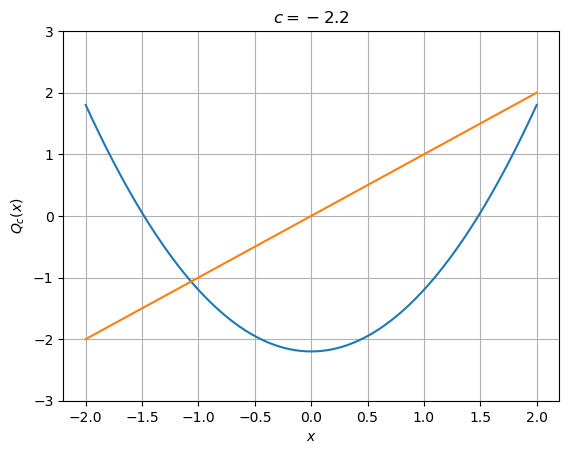

In [51]:
xrange = -2:1/64:2
z=y(xrange,(-2.2,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-3,3)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -2.2")
grid(true)


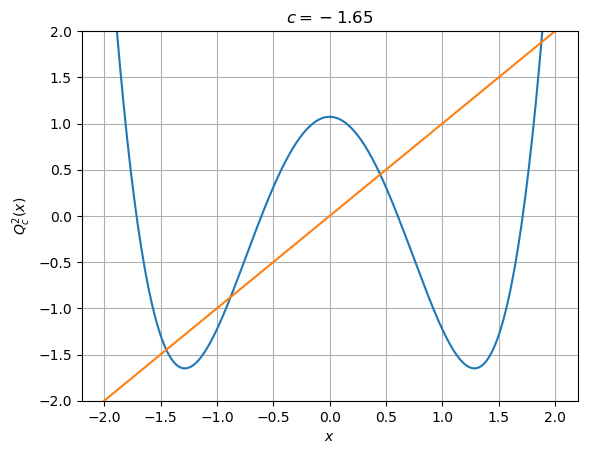

In [52]:
xrange = -2:1/64:2
z=y(xrange,(-1.65,2))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q^2_c(x)")
title(L"c =-1.65")
grid(true)


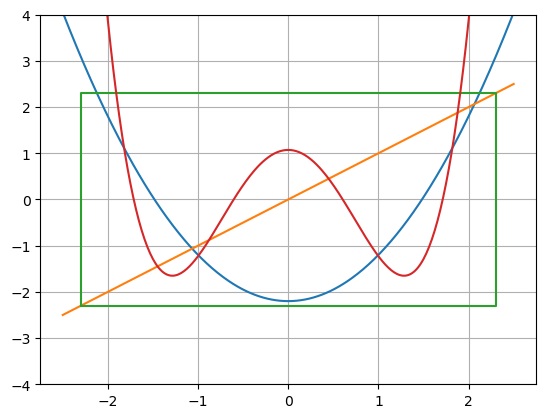

In [53]:
xrange = -2.5:1/64:2.5
z=y(xrange,(-2.2,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-4,4)

x₁ = -2.3
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
z=y(xrange,(-1.65,2))
plot(xrange, z)
grid(true)


Se observa una semejanza local similar para estos valores de $c$ y $c^{\prime}$. Sin embargo, a pesar de que en cada una de las comparaciones anteriores se muestran semejanzas locales bajo una reflexión, es importante notar que los mapeos $Q_c(x)$ y $Q^2_{c^{\prime}}(x)$ para esos valores específicos de $c$ y $c^\prime$ muestran una interesante semejanza en ciertas secciones, a continuación se señalarán con un cuadro verde: 

Recordemos que para para la familia cuadrática $Q_c(x)=x^2+c$ si $c<1/4$ los puntos fijos se encuentran ubicados en:

$     p_{\pm}= \frac{1}{2}(1 \pm \sqrt{1 - 4c})$

Para el mapeo $Q_c(x)$ en $c=1/4$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-3/4$ :

In [54]:
p₊(c)=1/2*(1+sqrt(1-4*c))

p₊ (generic function with 1 method)

In [55]:
p₋(c)=1/2*(1-sqrt(1-4*c))

p₋ (generic function with 1 method)

In [56]:
a1=p₋(1/4)

0.5

In [57]:
a2=p₊(1/4)

0.5

In [58]:
b1=p₋(-3/4)

-0.5

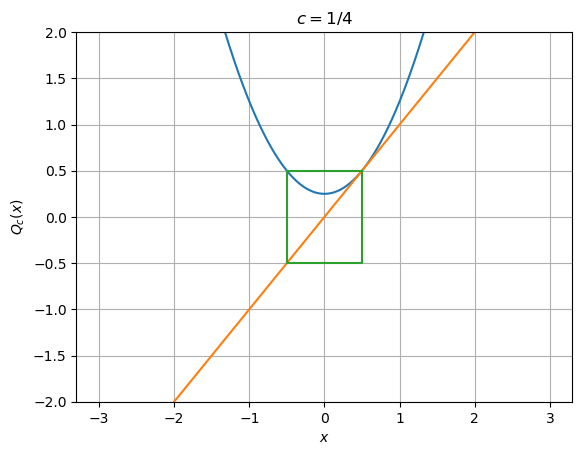

In [59]:
xrange = -3:1/64:3
z=y(xrange,(1/4,1))

plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = 1/4")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

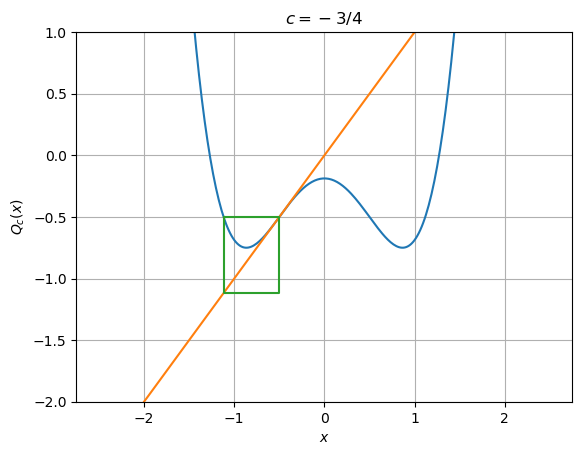

In [60]:
xrange = -2.5:1/64:2.5
z=y(xrange, (-3/4,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,1)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -3/4")
x₁ = -sqrt(5)/2
x₂ = b1
plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

Para el mapeo $Q_c(x)$ en $c=0$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1$ :

In [61]:
a1=p₋(0)

0.0

In [62]:
a2=p₊(0)

1.0

In [63]:
b1=p₋(-1)

-0.6180339887498949

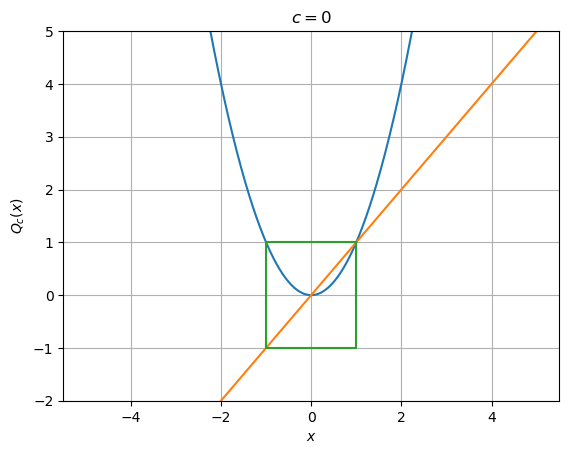

In [64]:
xrange = -5:1/64:5
z=y(xrange, (0,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,5)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = 0")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

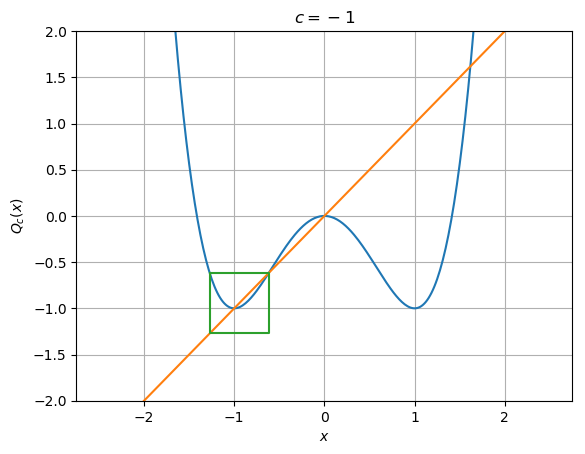

In [65]:
xrange = -2.5:1/64:2.5
z=y(xrange, (-1,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1")
x₁ = -1.27201964
x₂ = b1


plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

Para el mapeo $Q_c(x)$ en $c=-3/4$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-5/4$ :

In [66]:
a1=p₋(-3/4)

-0.5

In [67]:
a2=p₊(-3/4)

1.5

In [68]:
b1=p₋(-5/4)

-0.7247448713915889

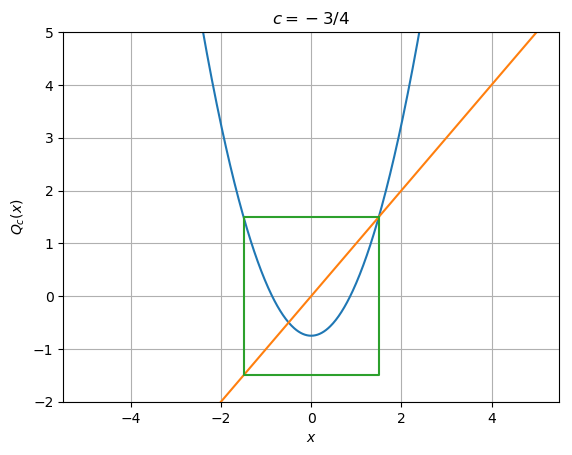

In [69]:
xrange = -5:1/64:5
z=y(xrange, (-3/4,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,5)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -3/4")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

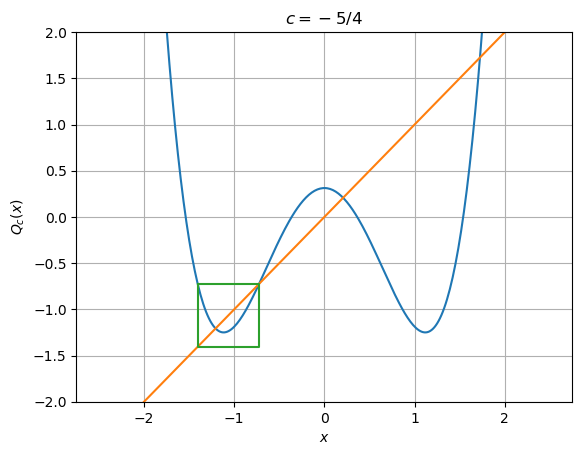

In [70]:
xrange = -2.5:1/64:2.5
z=y(xrange, (-5/4,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -5/4")
x₁ = -1.40526
x₂ = b1


plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

Para el mapeo $Q_c(x)$ en $c=-1$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.3$ :

In [71]:
a1=p₋(-1)

-0.6180339887498949

In [72]:
a2=p₊(-1)

1.618033988749895

In [73]:
b1=p₋(-1.3)

-0.7449899597988732

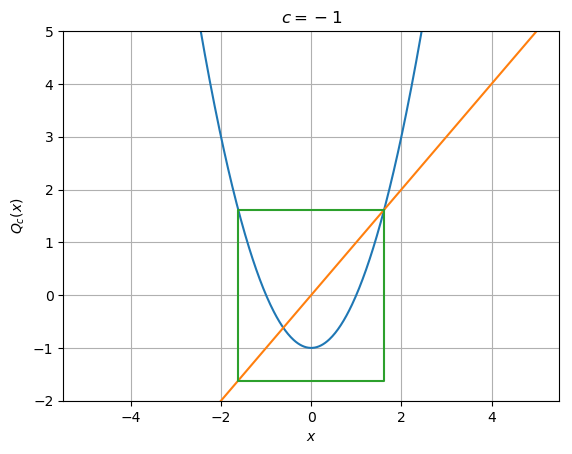

In [74]:
xrange = -5:1/64:5
z=y(xrange, (-1,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,5)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

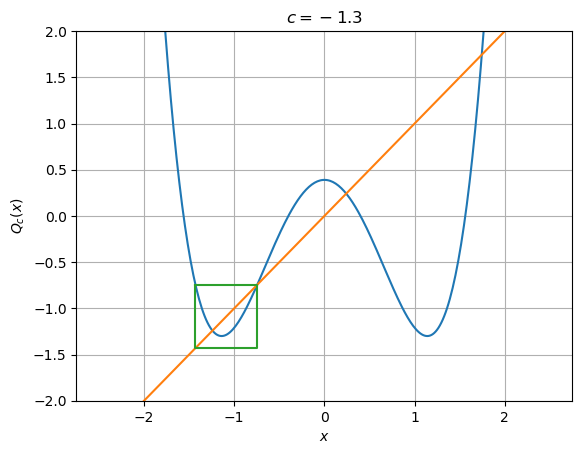

In [75]:
xrange = -2.5:1/64:2.5
z=y(xrange, (-1.3,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1.3")
x₁ = -1.43003
x₂ = b1


plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

Para el mapeo $Q_c(x)$ en $c=-2$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.546$ :

In [76]:
a1=p₋(-2)

-1.0

In [77]:
a2=p₊(-2)

2.0

In [78]:
b1=p₋(-1.546)

-0.8401492454200763

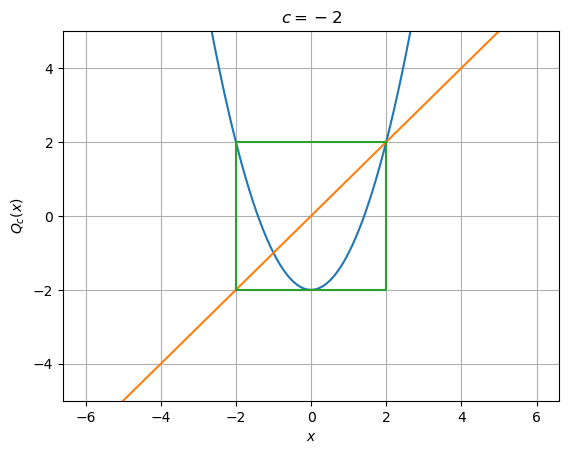

In [79]:
xrange = -6:1/64:6
z=y(xrange, (-2,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-5,5)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -2")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

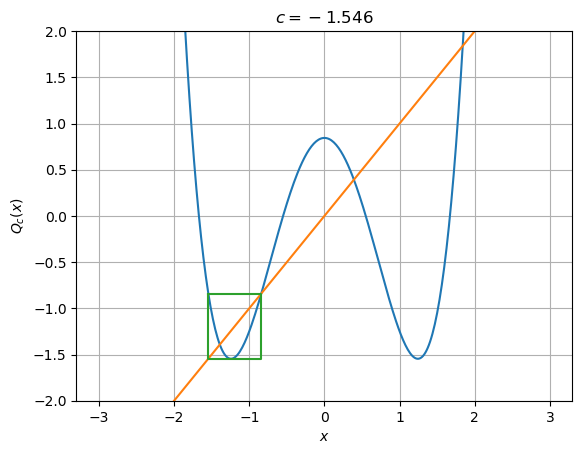

In [80]:
xrange = -3:1/64:3
z=y(xrange, (-1.546,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1.546")
x₁ = -1.54472
x₂ = b1


plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

Para el mapeo $Q_c(x)$ en $c=-2.2$ en comparación con el mapeo $Q_{c^{\prime}}^2(x)$ para $c^{\prime}=-1.65$ :

In [81]:
a1=p₋(-2.2)

-1.0652475842498528

In [82]:
a2=p₊(-2.2)

2.0652475842498528

In [83]:
b1=p₋(-1.65)

-0.8784048752090221

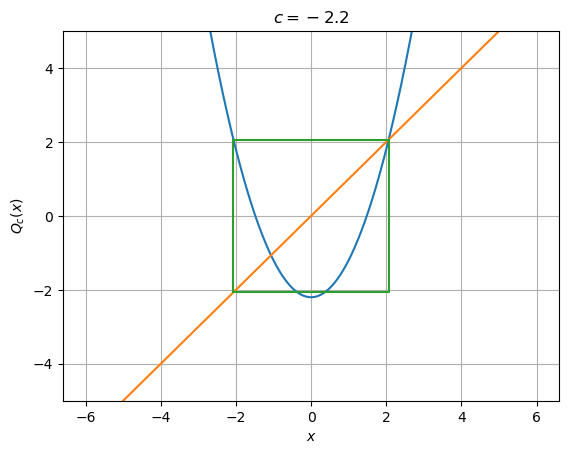

In [84]:
xrange = -6:1/64:6
z=y(xrange, (-2.2,1))
plot(xrange, z)
plot(xrange, xrange)
ylim(-5,5)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -2.2")
x₁ = a2
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)

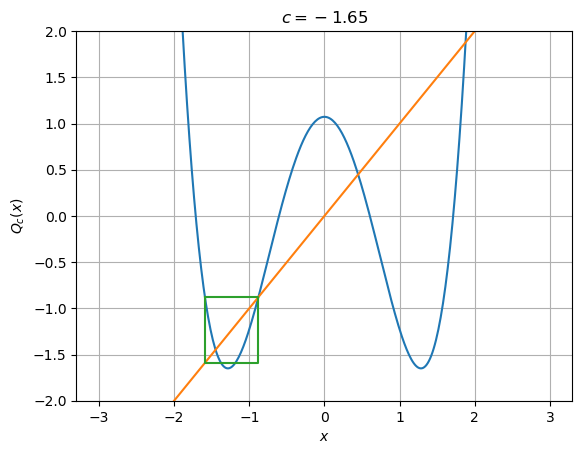

In [85]:
xrange = -3:1/64:3
z=y(xrange, (-1.65,2))
plot(xrange, z)
plot(xrange, xrange)
ylim(-2,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = -1.65")
x₁ = -1.5901
x₂ = b1


plot([x₁, x₂, x₂, x₁, x₁], [x₂, x₂,x₁,x₁,x₂])
grid(true)

De las gráficas anteriores podemos esperar que el mapeo $Q^2_{c^\prime}(x)$ tenga un comportamiento dinámico similar al del mapeo $Q_c(x)$, con la diferencia que la sección similar de $Q^2_{c^\prime}(x)$ se encuentra siempre en un intervalo más pequeño, lo cual tiene mucho sentido si recordamos la tarea 4, en particular el ejercicio en el que al ir disminuyendo los valores de  $c$ en el diagrama de bifurcaciones daba lugar a una sucesión de doblamiento de periodo dada por: $1,2,4,8,..2^n,...$. 

# 5

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

In [86]:
a1=p₋(-2.2)

-1.0652475842498528

In [87]:
a2=p₊(-2.2)

2.0652475842498528

In [88]:
b1=p₋(-1.65)

-0.8784048752090221

In [89]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n::Int` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n::Int)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx, x1)
        push!(fx, x1)
    end
    xx, fx
end

iteramapeo

In [90]:
Q(x)=x^2-2.2

Q (generic function with 2 methods)

Para $c=-2.2$ el intervalo $I=[-p_+,p_+]$ para el que $Q_c(x)=p_{+}$ es $I=[-2.0652475,2.0652475]$. Se muestra este intervalo encerrado en la caja morada, notemos que hay una pequeña porción de la gráfica que queda fuera de la caja.

El valor $x$ al que tiende casi cualquier condición inicial en el intervalo $I$ para cualquier número de iteraciones se puede caracterizar como un conjunto para el cual existan otros valores $x$ que satisfagan esta condición dentro del intervalo $I$; es decir, todos aquellos $x \in I$ tales que sin importar el número de iteraciones se tenga que ($Q_{-2.2}(x) \in I $) que las órbitas no escapen de $I$.

In [91]:
x1, fx1 = iteramapeo(Q,1.48,10); 
x2, fx2 = iteramapeo(Q, 1.49, 15);
x3, fx3 = iteramapeo(Q,-1.50,1); 
x4, fx4 = iteramapeo(Q, -1.48, 1);

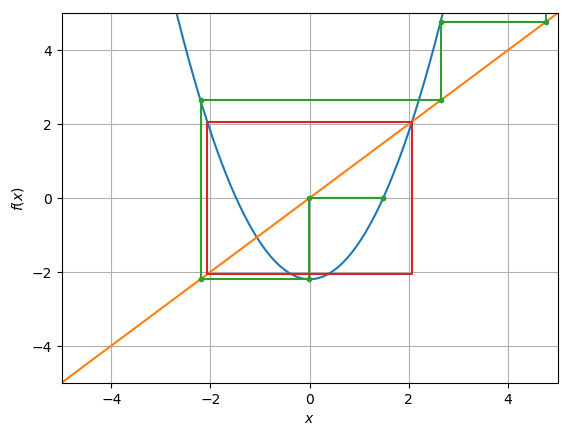

In [92]:
xrange=-5:1/32:5
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
ylabel(L"f(x)")
xlim(-5,5)
ylim(-5,5)
plot(xrange, xrange)
plot(x1, fx1, marker=".")
#label=L"x1",grid=true)
x₁ = 2.0652475842498528
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)
show()
#plot!(x2, fx2, marker=(:dot, 3, 0.4), label=L"x2\alpha")

Para caracterizar los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía, recordemos primero la porción de la gráfica que queda fuera de la caja morada definida por el intervalo $I$, el cual está mapeado fuera de $I$ por $Q_c(x)$.Este subintervalo está delimitado por $A_1= (-0.367087,0.367087)$, siendo $A_1$ el primer subintervalo o subconjunto para el cual su intersección $I$ después de $n=1$ iteración es vacía. Utilizando el análisis gráfico fue posible observar que cualquiera de los puntos en ese subintervalo tienen una órbita que escapa de $I$ y diverge incluso al iterar solamente una vez como se muestra abajo:

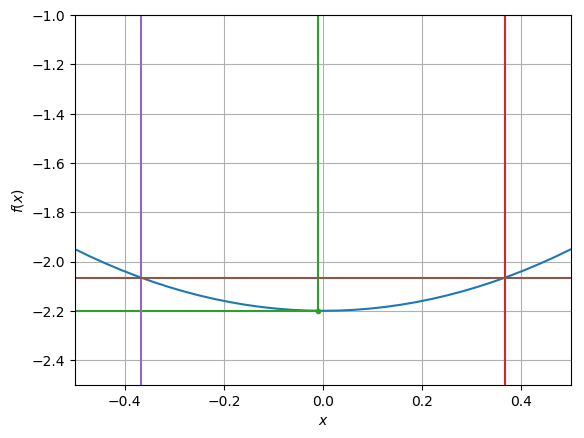

In [93]:
xrange=-0.5:1/32:0.5
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
ylabel(L"f(x)")
xlim(-.5,.5)
ylim(-2.5,-1)
plot(xrange, xrange)
plot(x1, fx1, marker=".")
#label=L"x1",grid=true)
x₁ = 2.0652475842498528
x₂ = 0.367087
plot([x₂,x₂],[-5,-1])
plot([-x₂,-x₂],[-5,-1])
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
grid(true)
show()

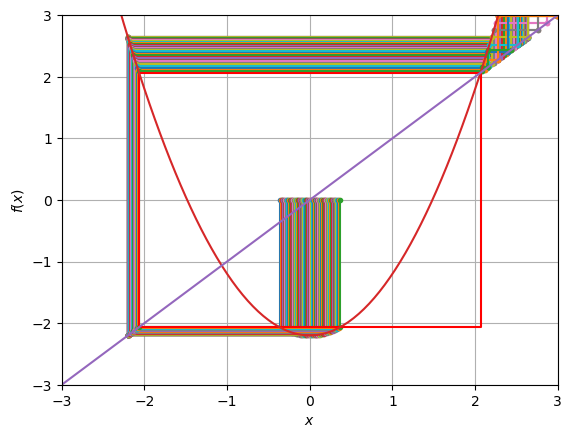

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000047296EB8>

In [94]:
#Puntos dentro del intervalo A₁
for i in -0.36:0.01:0.36
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
xrange=-3:1/32:3
z=Q.(xrange)
plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:red)
plot(xrange,z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-3,3)
grid(true)
plot(xrange, xrange)

Examinemos por secciones el intervalo  $[1.40 ,1.60]$:

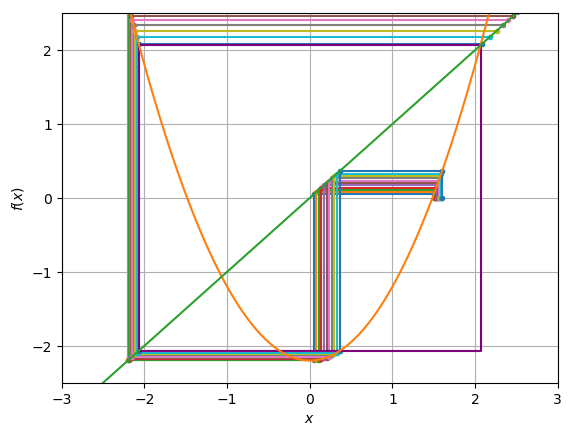

In [95]:
#Intervalo [1.50,1.60]
for i in 1.50:0.01:1.60
    a, fa1 = iteramapeo(Q,i,3)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
xrange=-3:1/32:3
z=Q.(xrange)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

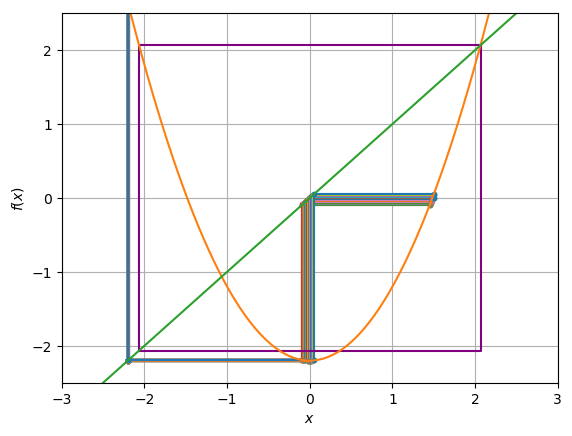

In [96]:
#Intervalo [1.45,1.50]
for i in 1.45:0.001:1.50
    a, fa1 = iteramapeo(Q,i,3)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528


plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

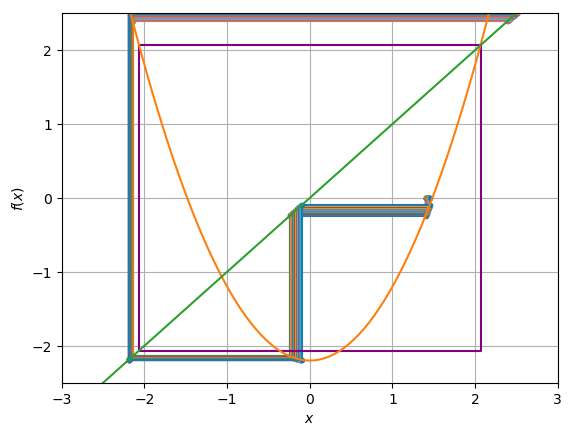

In [97]:
#Intervalo [1.40,1.45]
for i in 1.40:0.001:1.45
    a, fa1 = iteramapeo(Q,i,3)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528


plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

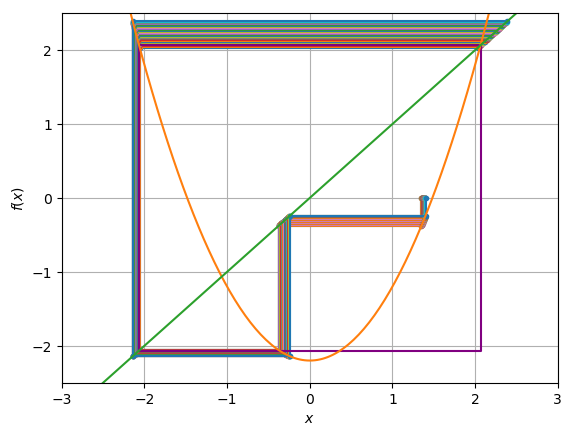

In [98]:
#Intervalo [1.35,1.40]
for i in 1.35:0.001:1.40
    a, fa1 = iteramapeo(Q,i,3)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528


plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

Notemos que estos pequeños intervalos abiertos presentan la característica de que $Q_c(x) \in A_1$, por lo que las órbitas de estos puntos escapan después de dos iteraciones. Aproximadamente este intervalo completo está delimitado por: $(1.35,1.60)$.

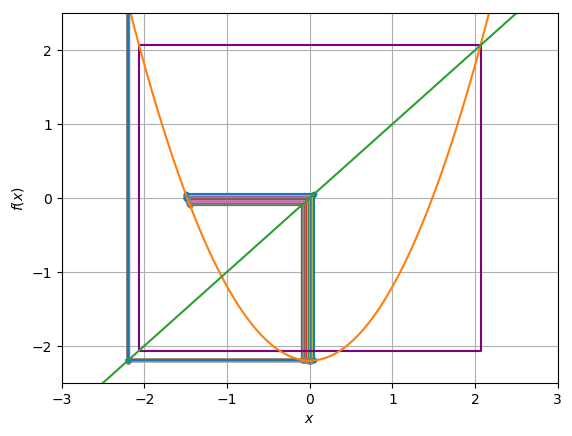

In [99]:
#Intervalo [-1.45,-1.50]
for i in -1.45:-0.001:-1.50
    a, fa1 = iteramapeo(Q,i,3)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528


plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

Este conjunto de puntos se ecuentra en un intervalo abierto para el cuál si $x$ está en este intervalo , $Q_c(x) \in A_1$. Entonces la órbita de $x$ escapa después de dos iteraciones. De manera simétrica existe otro conjunto de puntos que satisfacen esa misma propiedad. Por lo que estos dos subintervalos abiertos definen al intervalo $A_2$ tal que después de $n=2$ iteraciones sus órbitas escapan de $I$; es decir, su intersección con $I$ es vacía después de dos iteraciones. 

Ahora debemos encontrar el itervalo o intervalos tales que $Q_c(x) \in A_2$; es decir, que depués de $n=3$ iteraciones su intersección con $I$ sea vacía. Para ello examinemos por secciones para puntos de x por encima del conjunto $A_2$:

Nota: Las barras negras indican de manera aproximada los límites del par de intervalos abiertos de $A_2$.

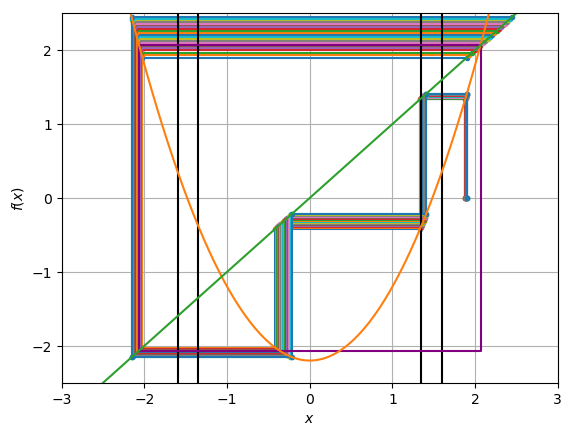

In [100]:
#Intervalo (1.88,1.90)
for i in 1.88:0.001:1.90
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60

plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)
plot([-x₂,-x₂],[-5,3],color=:black)
plot([-x₃,-x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

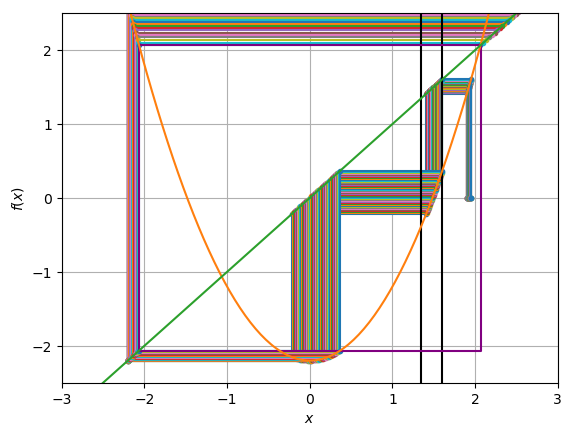

In [101]:
#Intervalo (1.90,1.95)
for i in 1.90:0.001:1.95
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60

plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

Notemos que estos pequeños intervalos abiertos presentan la característica de que $Q_c(x) \in A_2$, por lo que las órbitas de estos puntos escapan después de tres iteraciones. Aproximadamente este primer subintervalo completo está delimitado por: $(1.88,1.95)$.

Ahora examinemos por secciones para puntos de $x$ por debajo del conjunto $A_2$:

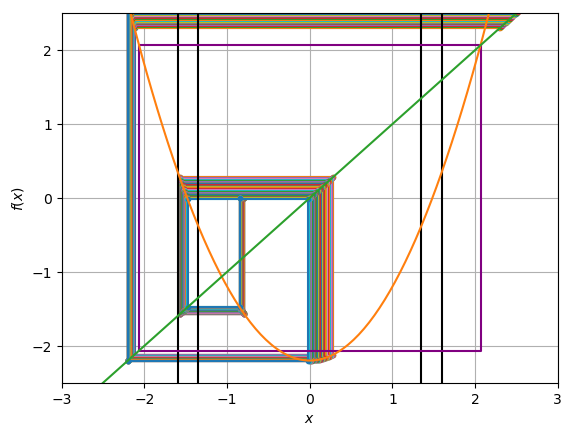

In [102]:
#Intervalo (-0.85,-0.79)
for i in -0.79:-0.001:-0.85
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60
plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)
plot([-x₂,-x₂],[-5,3],color=:black)
plot([-x₃,-x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

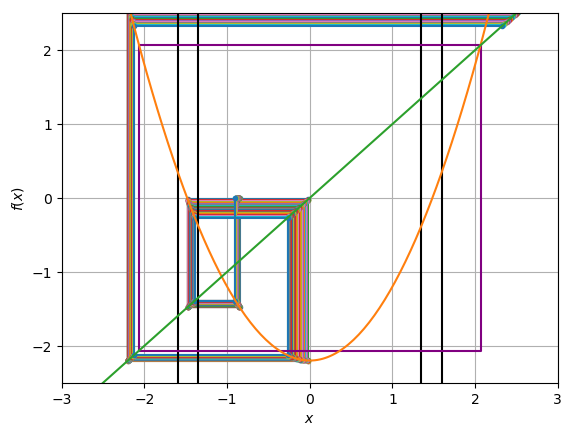

In [103]:
#Intervalo (-0.90,-0.85)
for i in -0.85:-0.001:-0.90
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60

plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)
plot([-x₂,-x₂],[-5,3],color=:black)
plot([-x₃,-x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

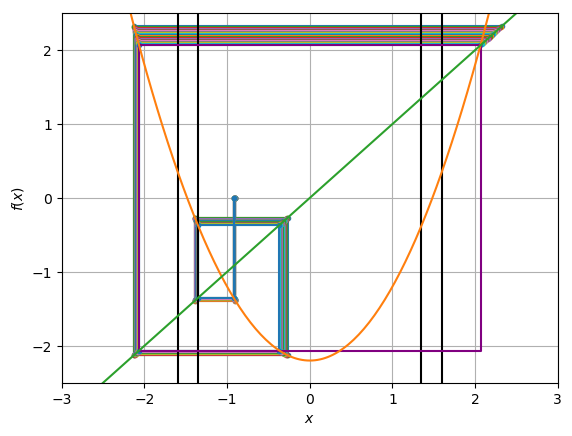

In [104]:
#Intervalo (-0.92,-0.90)
for i in -0.90:-0.001:-0.92
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60

plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)
plot([-x₂,-x₂],[-5,3],color=:black)
plot([-x₃,-x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

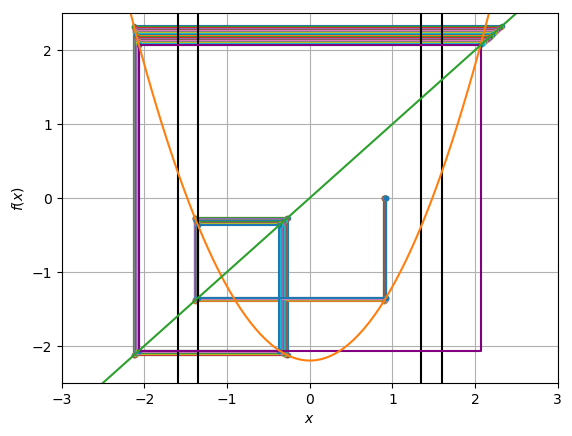

In [105]:
#Intervalo (0.90,0.92)
for i in 0.90:0.001:0.92
    a, fa1 = iteramapeo(Q,i,4)
    
    plot(a,fa1,marker=".")
end

x₁ = 2.0652475842498528
x₂ = 1.35
x₃ = 1.60

plot([x₂,x₂],[-5,3],color=:black)
plot([x₃,x₃],[-5,3],color=:black)
plot([-x₂,-x₂],[-5,3],color=:black)
plot([-x₃,-x₃],[-5,3],color=:black)

plot([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁],color=:purple)
xrange=-3:1/32:3
z=Q.(xrange)
plot(xrange, z)
xlabel(L"x")
xlim(-3,3)
ylabel(L"f(x)")
ylim(-2.5,2.5)
plot(xrange, xrange)
grid(true)

Estos pequeños subintervalos abiertos también presentan la característica de que $Q_c(x) \in A_2$, por lo que las órbitas de estos puntos escapan después de tres iteraciones. Aproximadamente este segundo subintervalo completo está delimitado por: $(-0.79,-0.92)$.

Este conjunto de puntos se ecuentra en intervalos abiertos para los cuales si $x$ está en estos intervalos , $Q_c(x) \in A_2$. Entonces la órbita de $x$ escapa después de tres iteraciones. De manera simétrica existe otro par de intervalos de puntos que satisfacen esa misma propiedad. Por lo que estos cuatro subintervalos abiertos definen al intervalo $A_3$ tal que después de $n=3$ iteraciones sus órbitas escapan de $I$; es decir, su intersección con $I$ es vacía después de tres iteraciones.

Siguiendo de este modo, podemos darnos cuenta de que cada vez existirán más subintervalos para los cuáles las órbitas de sus puntos escapen de $I$, en particular siguen una sucesión, pues para $A_1$ existe 1, para $A_2$ existen 2, para $A_3$ existen 4 de modo que para $A_n$ existirán $2^{n-1}$ subintervalos que escapen de $I$ para $n$ iteraciones.



Por último, para caracterizar al complemento del conjunto de los casos anteriores; es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. 

Para ello, debemos notar que si un punto $x$ tiene una órbita que se escapa de $I$ para $n$ iteraciones, entonces debe pertenecer a $A_n$, por lo que el complemento de los casos anteriores se puede ver como la unión de cada uno de estos conjuntos.

Si denotamos al complemento como $C_I$, entonces podemos definir a $C_I$ como:

$        C_I=A_1 \cup A_2 \cup A_3 \cup ... = \cup A_n$

Este tipo de conjunto, recuerda mucho al llamado "conjunto ternario de Cantor" para el cual si se considera este caso, al remover $A_1$ del intervalo $I$ quedan dos intervalos cerrados. Luego, al remover $A_2$ quedan cuatro intervalos cerrrados, posteriormente al remover $A_3$ quedan 8 intervalos cerrados y así sucesivamente de manera que al remover $A_n$ quedarán $2^n$ intervalos cerrados. 


# 6

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, usen el método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

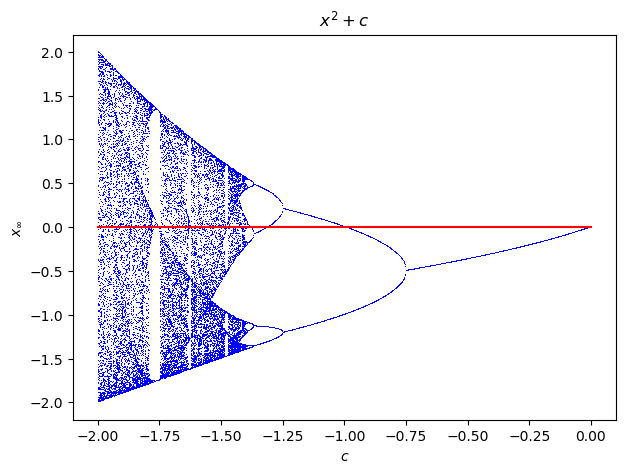

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000047867668>

In [106]:
Sc(x,c)=x^2+c

crange = -2:1/2^9:0

ff = diag_bifurc(Sc, 100000, 64, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
figure(figsize=(7,5))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title(L"x^2+c")
plot([-2,0], [0.0,0.0], "r-")

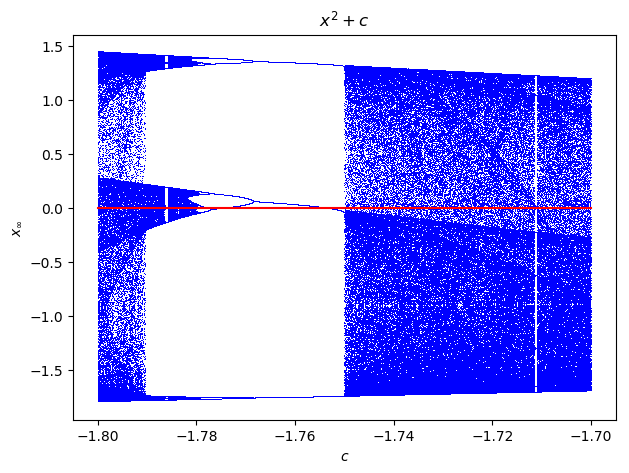

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004B2E9400>

In [107]:
Sc(x,c)=x^2+c

crange = -1.8:1/2^15:-1.70

ff = diag_bifurc(Sc, 100000, 128, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
figure(figsize=(7,5))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title(L"x^2+c")
plot([-1.8,-1.7], [0.0,0.0], "r-")

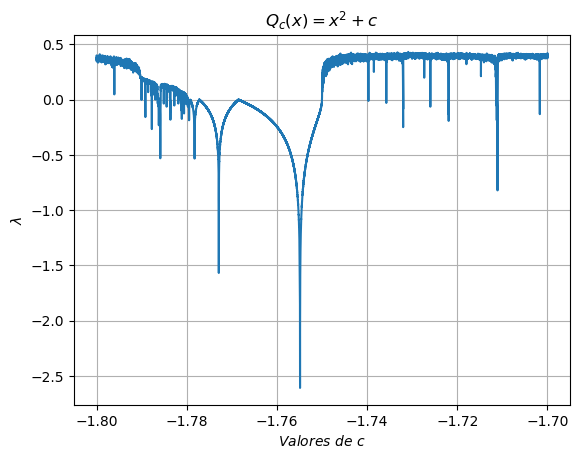

In [108]:
c_valores,L=Lyapunov(Sc,0.1,1000,-1.8:1/2^18:-1.7)
plot(c_valores,L,)
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")
show()

In [109]:
Q3c = c -> Qcⁿ(0.0, (c,3))
raíz = roots_newton(Q3c,-1.7)

-1.7548776662466927

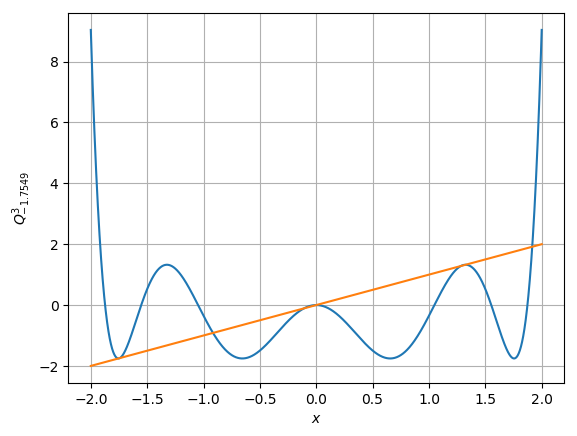

In [110]:
Q3x= x ->(Qcⁿ(x, (-1.7548776662466927,3)))
xarrange=-2:1/2^11:2
yx=Q3x.(xarrange)
plot(xarrange,yx)
plot(xarrange,xarrange)
xlabel(L"x")
ylabel(L"Q_{-1.7549}^3")
grid(true)
show()

In [111]:
Q3x= x ->(Qcⁿ(x, (-1.7548776662466927,3))-x)
sols1=soluciones(Q3x,-1.8:1/2^9:-1.7)
sols2=soluciones(Q3x,-1)
sols3=soluciones(Q3x,-0.2:1/2^3:0.1)
sols4=soluciones(Q3x,1.25:1/2^9:1.33)
#sols5=soluciones(Q3x,1.91593)
sols=[]
append!(sols1,sols2)
append!(sols1,sols3)
append!(sols1,sols4)
#push!(sols,sols4)
push!(sols1,1.9159370276416576)
sols=sols1

8-element Array{Any,1}:
 -1.75488  
 -1.74285  
 -0.915937 
 -0.10965  
  2.434e-16
  1.28266  
  1.32472  
  1.91594  

In [112]:
Q3x= x ->(Qcⁿ(x, (-1.7548776662466927,3)))
deri=[]
for i in sols
    r1=dual(i)
    dr=Q3x(r1).x′
    push!(deri,dr)
end
deri

8-element Array{Any,1}:
 -4.12953e-15
  1.96098    
 -6.14733    
  1.96098    
 -4.5267e-15 
  1.96098    
 -4.12953e-15
 56.2644     

In [113]:
println("Valor                 ->  Derivada")
for i in 1:1:8
    println(string(sols[i])*"   ->   "*string(deri[i]))
end

Valor                 ->  Derivada
-1.7548776662466927   ->   -4.129528643028283e-15
-1.7428545378333946   ->   1.9609786700264438
-0.9159370276416577   ->   -6.147334359133518
-0.109650026964421   ->   1.9609786700264555
2.434003232256214e-16   ->   -4.526696817614219e-15
1.2826642737997624   ->   1.9609786700264513
1.324717957244746   ->   -4.129528643028283e-15
1.9159370276416576   ->   56.264398349054055


De estos valores excluimos al -0.9159370276416577 y al 1.9159370276416576 por ser los puntos fijos de periodo 1.

Vemos que los puntos en la órbita inestable (que tienen $|Q^3_c(x)'|>1$) son:

$\gamma=-1.7428545378333946$

$\beta=-0.109650026964421$

$\alpha=1.2826642737997624$

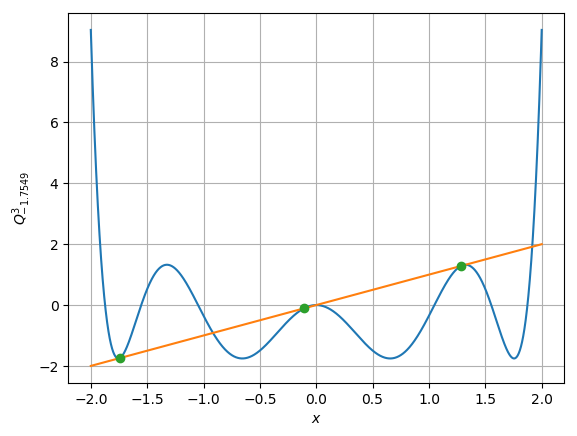

In [114]:
Q3x= x ->(Qcⁿ(x, (-1.7548776662466927,3)))
xarrange=-2:1/2^11:2
yx=Q3x.(xarrange)
ines=[-1.7428545378333946,-0.109650026964421,1.2826642737997624]
plot(xarrange,yx)
plot(xarrange,xarrange)
plot(ines,ines,"o")
xlabel(L"x")
ylabel(L"Q_{-1.7549}^3")
grid(true)
show()

In [115]:
ines=[-1.7428545378333946,-0.109650026964421,1.2826642737997624]
Q3x(ines[3])

1.2826642737997627

Resolvemos para encontrar los puntos $\hat\alpha, \hat\beta, \hat\gamma$

In [133]:
solsh=[]
for i in ines
    Q3x2= x ->(Qcⁿ(x, (-1.7548776662466927,3))-i)
    append!(solsh,soluciones(Q3x2,i+0.3))
end
for i in solsh
    println(i)
end

-1.766452592024599
0.10965002696442099
1.3654770936237315


$\hat\gamma=-1.766452592024599$

$\hat\beta=0.10965002696442099$

$\hat\alpha=1.3654770936237315$

In [209]:
gammas=-1.766452592024599:1/2^11:-1.7428545378333946
betas=-0.109650026964421:1/2^6:0.10965002696442099
alfas=1.2826642737997624:1/2^7:1.3654770936237315
Qcc=x->x^2-1.7548776662466927

(::#62) (generic function with 1 method)

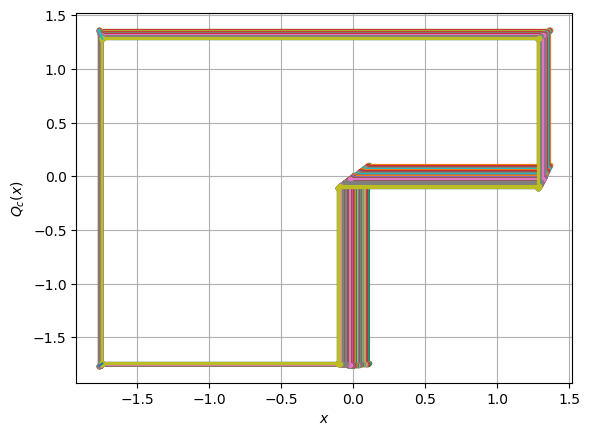

[-1.74285, -1.75164, -1.75407, -1.75469, -1.75484, -1.75487, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75488, -1.75487, -1.75484, -1.75472, -1.75424, -1.75252, -1.74675]


In [215]:
finales=[]
for i in gammas
    a, fa1 = iteramapeo(Qcc,i,15)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
    plot(a,fa1,marker=".")
end

finales=unique(finales)
println(finales)
z=Qcc.(gammas)
plot(gammas, z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"Q_c(x)")
#ylim(-1.75,-1.5)
plot(gammas, gammas)
grid(true)

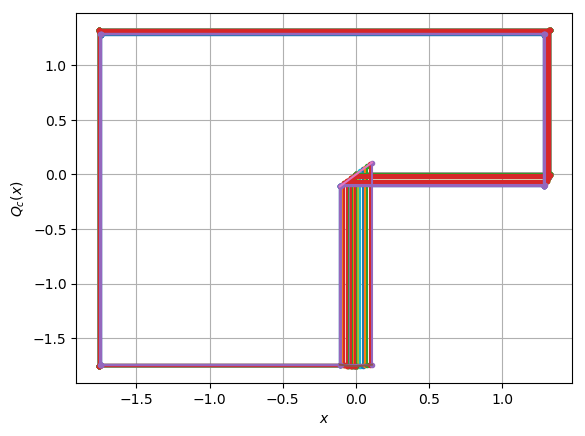

[-0.10965, -0.0010405, -3.54885e-6, -3.15167e-9, -3.51719e-13, 2.22045e-16, -2.42251e-13, -2.38388e-9, -2.84342e-6, -0.000867593, -0.0947315]


In [216]:
finales=[]
for i in betas
    a, fa1 = iteramapeo(Qcc,i,15)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
    plot(a,fa1,marker=".")
end

finales=unique(finales)
println(finales)
z=Qcc.(betas)
plot(betas, z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"Q_c(x)")
#ylim(-1.75,-1.5)
plot(betas, betas)
grid(true)

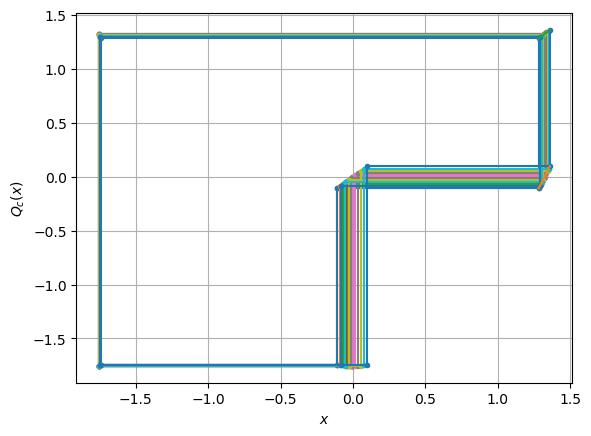

[-1.74285, -1.74946, -1.75291, -1.75438, -1.75482, -1.75488, -1.75488, -1.75477, -1.75412, -1.75209, -1.74749]


In [217]:
finales=[]
for i in alfas
    a, fa1 = iteramapeo(Qcc,i,5)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
    plot(a,fa1,marker=".")
end

finales=unique(finales)
println(finales)
z=Qcc.(alfas)
plot(alfas, z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"Q_c(x)")
#ylim(-1.75,-1.5)
plot(alfas, alfas)
grid(true)

En los tres diagramas anteriores notamos que los mapeos dentro de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$ forman órbitas cerradas dentro de los intervalos

In [223]:
I0=0.10965002696442099:1/2^4:1.2826642737997624
I1=-1.7428545378333946:1/2^4:-0.109650026964421

-1.7428545378333946:0.0625:-0.11785453783339461

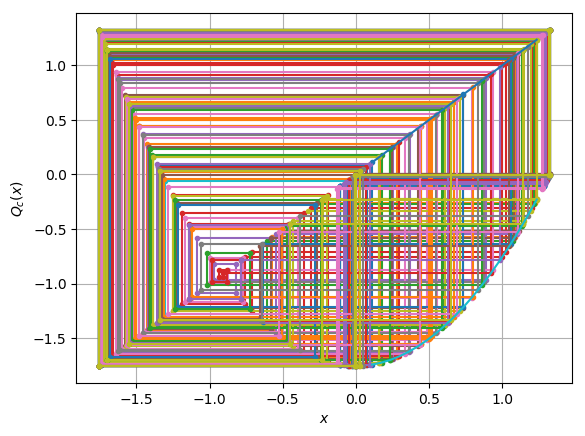

[-1.75488, -1.75488, -1.75311, -1.75268, -1.55625, -1.55137, -0.481528, -0.33056, -0.225137, -0.10965, 2.22045e-16, 0.157965, 0.868154, 0.907024, 1.26341, 1.30978, 1.32192, 1.32265, 1.32463]


In [227]:
I0=0.10965002696442099:1/2^4:1.2826642737997624
finales=[]
for i in I0
    a, fa1 = iteramapeo(Qcc,i,15)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
    plot(a,fa1,marker=".")
end

finales=unique(finales)
finales=sort!(finales)
println(finales)
z=Qcc.(I0)
plot(I0, z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"Q_c(x)")
#ylim(-1.75,-1.5)
plot(I0, I0)
grid(true)

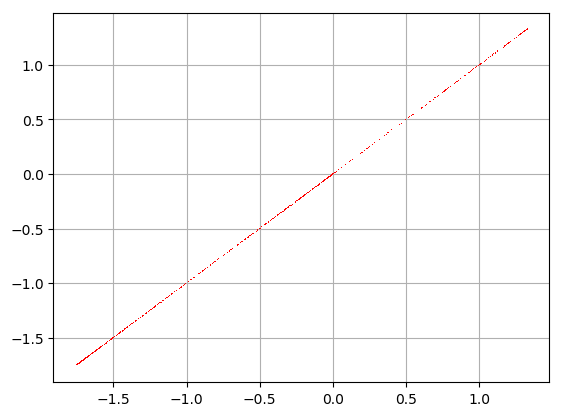

Inicial
-1.7548776662466927
Final
1.324717957244746


In [251]:
I0=0.10965002696442099:1/2^10:1.2826642737997624
finales=[]
for i in I0
    a, fa1 = iteramapeo(Qcc,i,25)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
end
finales=unique(finales)
finales=sort!(finales)
nn=size(finales,1)
grid(true)
plot(finales, finales,"r,")
println("Inicial")
println(finales[1])
println("Final")
println(finales[nn])

La gráfica anterior muestra el mapeo identidad del dominio; el cuál claramente incluye a $I_1$ por lo que: $Q_c(I_0) \supset I_1$

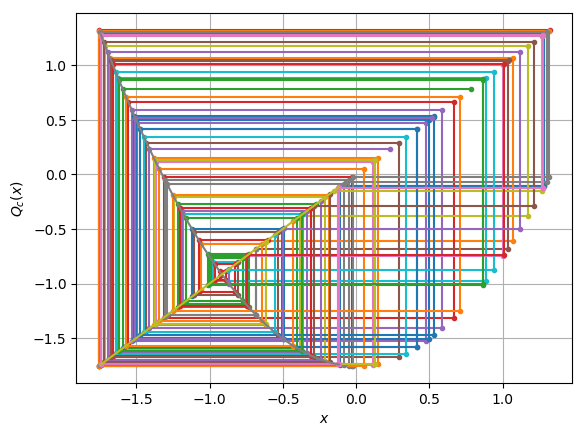

Inicial
-1.754300859503775
Final
1.3217255862842674


In [267]:
I1=-1.7428545378333946:1/2^4:-0.109650026964421
finales=[]
for i in I1
    a, fa1 = iteramapeo(Qcc,i,5)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
    plot(a,fa1,marker=".")
end

finales=unique(finales)
finales=sort!(finales)
nn=size(finales,1)
z=Qcc.(I1)
plot(I1, z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"Q_c(x)")
#ylim(-1.75,-1.5)
plot(I1, I1)
grid(true)
println("Inicial")
println(finales[1])
println("Final")
println(finales[nn])

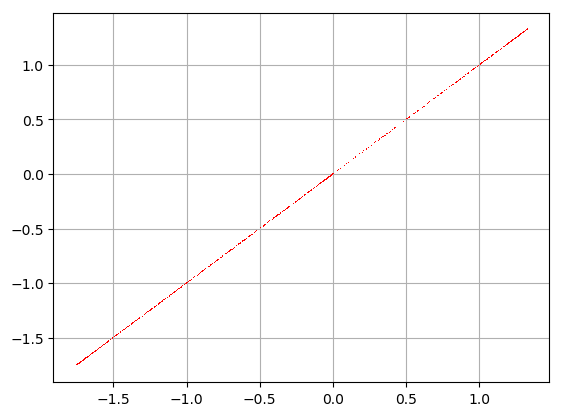

Inicial
-1.7548776662466927
Final
1.324717957244746


In [261]:
I1=-1.7428545378333946:1/2^10:-0.109650026964421
finales=[]
for i in I1
    a, fa1 = iteramapeo(Qcc,i,25)
    nn=size(a,1)
    fa1[1]=a[2]
    fa1=fa1[1:nn]
    push!(finales,fa1[nn])
end
finales=unique(finales)
finales=sort!(finales)
nn=size(finales,1)
grid(true)
plot(finales, finales,"r,")
println("Inicial")
println(finales[1])
println("Final")
println(finales[nn])

Esta otra gráfica muetra el mismo conjunto que la anterior a pesar de ahora ser resultado de mapeao $I_1$, por lo que $Q_c(I_1) \supset I_0\cup I_1$

Las propiedades importantes de la funcion son que el exponente de Lyapunov es negativo, sin embargo coexisten a la vez una órbita estable y una inestable. 